# Pixel Intensity

This notebook demonstrates how to calculate the respiratory rate from the average pixel intensity in the chest region of a video.

In [24]:
from respiration.dataset import VitalCamSet

dataset = VitalCamSet()

subject = 'Proband12'
scenario = '101_natural_lighting'

num_frames = 30 * 20  # 20 seconds of video
frames, video_params = dataset.get_video_rgb(
    subject,
    scenario,
    num_frames=num_frames,
    show_progress=True)
ground_truth = dataset.get_breathing_signal(subject, scenario)

  0%|          | 0/600 [00:00<?, ?it/s]

## Calculate the average pixel intensity in the chest region

In [25]:
import numpy as np
import respiration.roi as roi
import respiration.extractor.pixel_intensity as pixel_intensity

chest_roi = roi.detect_chest(frames[0])

signals = []
for channel in range(frames.shape[3]):
    # Calculate the average pixel intensity in the chest region
    channel_frames = frames[:, :, :, channel]
    average_pixels = pixel_intensity.average_pixel_intensity(channel_frames, chest_roi)
    signals.append(average_pixels)
    
# Concatenate the signals from all channels
signals = np.stack(signals, axis=1)
signals.shape

(600, 3)

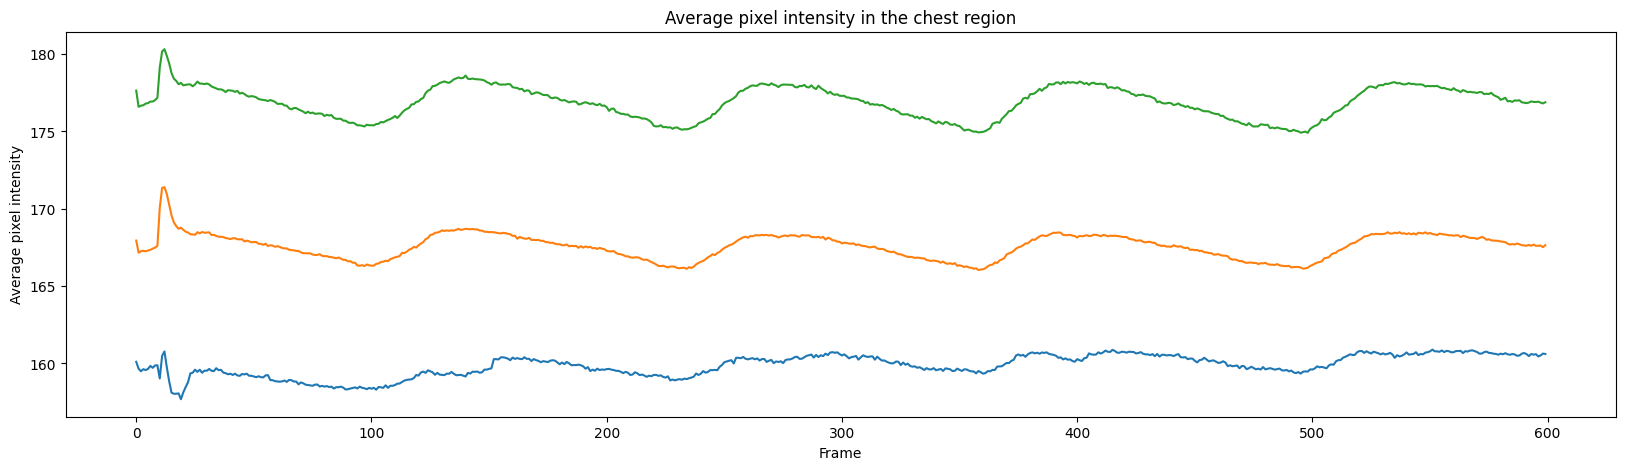

In [26]:
# Plot the average pixel intensity in the chest region
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(signals)
plt.title('Average pixel intensity in the chest region')
plt.xlabel('Frame')
plt.ylabel('Average pixel intensity')
plt.show()

## Compare signal with ground truth

In [27]:
average_pixels = signals.mean(axis=1)

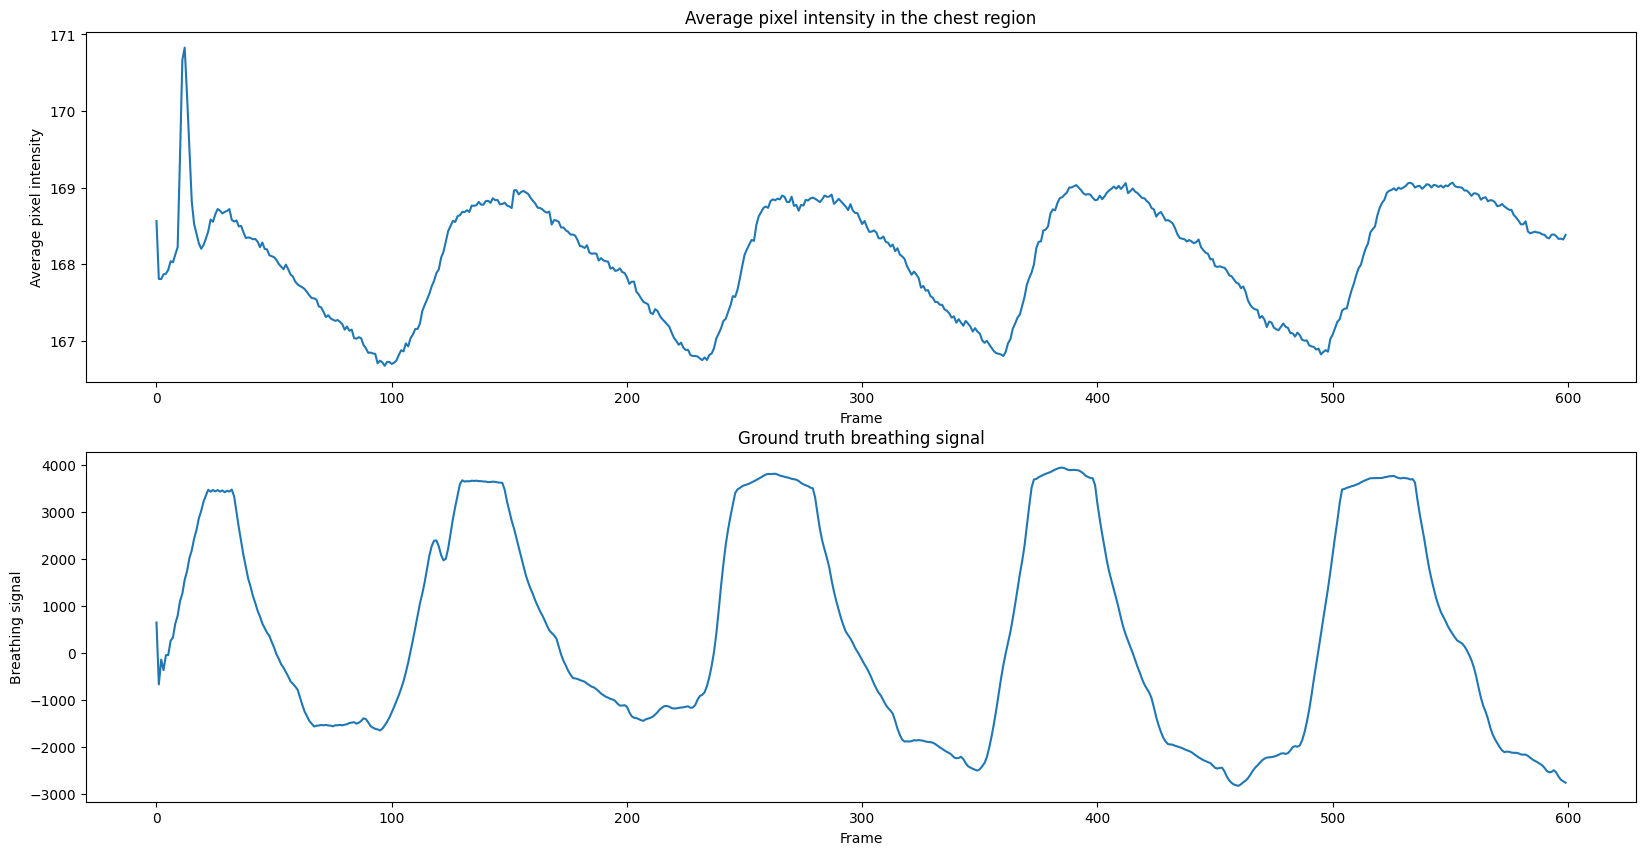

In [28]:
import matplotlib.pyplot as plt

# Plot the average pixel intensity and the ground truth breathing signal in two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

axs[0].plot(average_pixels)
axs[0].set_title('Average pixel intensity in the chest region')
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('Average pixel intensity')

axs[1].plot(ground_truth[:len(average_pixels)])
axs[1].set_title('Ground truth breathing signal')
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('Breathing signal')
plt.show()